To implement:  
- [x] Galsim shear transormation of an image  
- [ ] Shear transformation given jac matrix in tensorflow
- [ ] Jacobian computation given given shear parameters

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## GalSim transformation

In [2]:
import galsim

In [3]:
gal_flux = 1.e5    # counts
gal_r0 = 2.7       # arcsec
g1 = 0.1           #
g2 = 0.2           #
pixel_scale = 0.2  # arcsec / pixel

# Define the galaxy profile.
gal = galsim.Exponential(flux=gal_flux, scale_radius=gal_r0)

# Shear the galaxy by some value.
# There are quite a few ways you can use to specify a shape.
# q, beta      Axis ratio and position angle: q = b/a, 0 < q < 1
# e, beta      Ellipticity and position angle: |e| = (1-q^2)/(1+q^2)
# g, beta      ("Reduced") Shear and position angle: |g| = (1-q)/(1+q)
# eta, beta    Conformal shear and position angle: eta = ln(1/q)
# e1,e2        Ellipticity components: e1 = e cos(2 beta), e2 = e sin(2 beta)
# g1,g2        ("Reduced") shear components: g1 = g cos(2 beta), g2 = g sin(2 beta)
# eta1,eta2    Conformal shear components: eta1 = eta cos(2 beta), eta2 = eta sin(2 beta)
gal = gal.shear(g1=g1, g2=g2)

In [4]:
image_original = gal.original.drawImage(scale=pixel_scale).array
image_shear = gal.drawImage(scale=pixel_scale).array

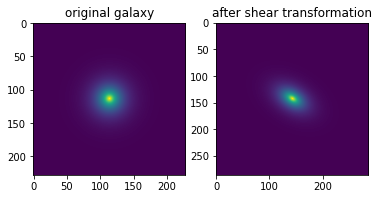

In [5]:
subplot(121)
imshow(image_original)
title('original galaxy')
subplot(122)
title('after shear transformation')
imshow(image_shear)

## Tensorflow transformation

In [6]:
import tensorflow as tf
import tensorflow_addons as tfa

In [7]:
img = tf.convert_to_tensor(image_original)

In [8]:
# get the jacobian matrix
jac = galsim.Shear(g1=g1, g2=g2).getMatrix()#.ravel().tolist()
jac = tf.cast(jac, float32)

In [9]:
#transform = tf.convert_to_tensor([jac[0,0], 0., jac[0,1], jac[1,0], 0., jac[1,1], 0., 0.])
transform = tf.convert_to_tensor([jac[0,0], jac[0,1], 0., jac[1,0], jac[1,1], 0., 0., 0.])
img2 = tfa.image.transform(img, transforms=transform)

/Users/benjamin/.local/lib/python3.8/site-packages/tensorflow_addons/image/transform_ops.py:142: UserWarning: fill_value is not supported and is always 0 for TensorFlow < 2.4.0.
  warnings.warn(


Text(0.5, 1.0, 'after tfa transformation')

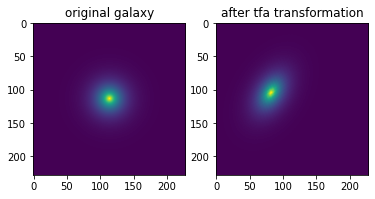

In [10]:
subplot(121)
imshow(img.numpy())
title('original galaxy')
subplot(122)
imshow(img2.numpy())
title('after tfa transformation')